# Run Autoencoder Model

In this notebook, we will run the model `auto-encoder.h5` that we trained in the previous notebook. We will use the model to generate new images from the test set.

## Imports

In [35]:
from keras.models import Model
from keras.models import load_model

from keras.datasets import mnist
import numpy as np
import cv2
from matplotlib import pyplot as plt

## Load Data

In [36]:
(x_train, _), (x_test, _) = mnist.load_data()

# Normalise Data (as we did in production)

In [37]:
x_test = x_test.astype('float32') / 255.


## Load Model

In [76]:
model = load_model('auto-encoder-CNN.h5')

## Add Noise

In [39]:
def add_noise(x_train):
    noise_factor = 0.5
    x_train_noisy = x_train + noise_factor * \
        np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)

    x_train_noisy = np.clip(x_train_noisy, 0., 1.)
    return x_train_noisy

## Testing Loop
Here we use `matplotlib` to plot the original image, the noisy image, and the reconstructed image.

We reshape the data so that an indivdual image is passed to the model. The model returns a prediction and we reshape it back to the original image size.

1/1 [==============================] - 0s 15ms/step


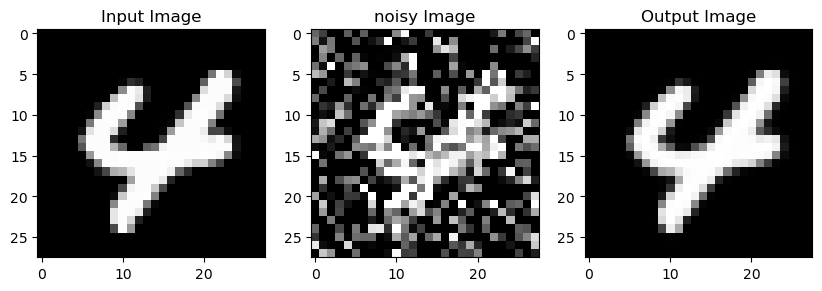

In [86]:
## Pick a random image from the test set
i = np.random.randint(0, len(x_test))
input_img = x_test[i]
noisy_input_img = add_noise(input_img)
output_img = model.predict(input_img.reshape(1, 28, 28))[
    0].reshape(28, 28, 1)

# Plot the input and output images
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.imshow(input_img, cmap='gray')
plt.title('Input Image')
plt.subplot(1, 3, 2)
plt.imshow(noisy_input_img, cmap='gray')
plt.title('noisy Image')
plt.subplot(1, 3, 3)
plt.imshow(output_img, cmap='gray')
plt.title('Output Image')
plt.show()


## Evaluation
It's clearly performing much worse that in the training.



## Debugging
- When inference is happening is worse/differently in product than in training, the first place to look is in the data preparation.
  - In the above example, we forgot to normalize the data vs in production!
- Unfortunately, instead of throwing an error - it silently gave us degraded results.

So we need to go back and add the following line to the data preparation code:
```py
x_test = x_test.astype('float32') / 255.
```

| Without Normalised Data - performs much worse | With Normalised Data - Performs as expected|
| --- | --- |
| 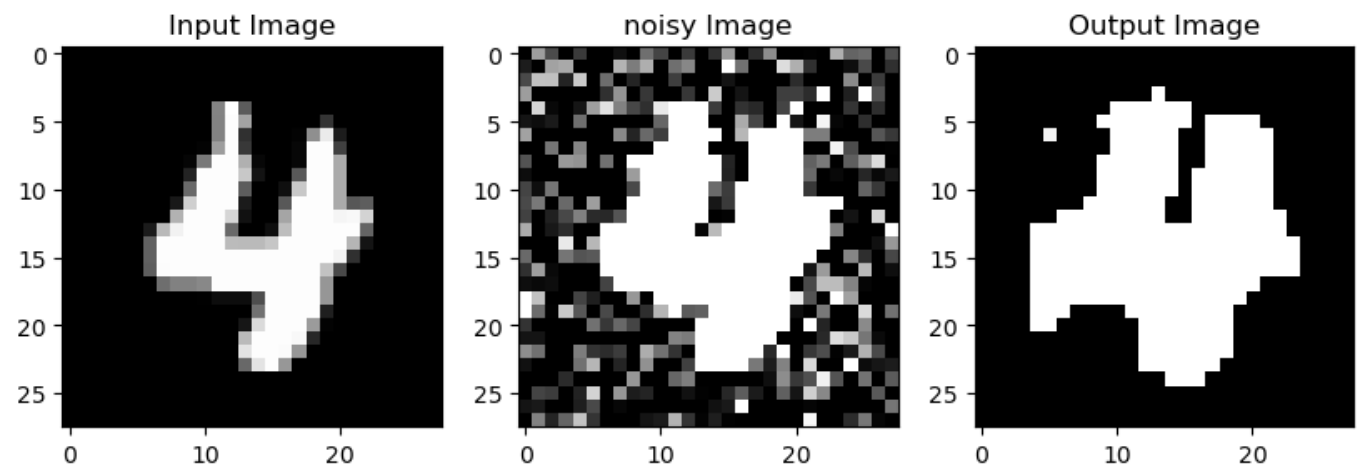 | 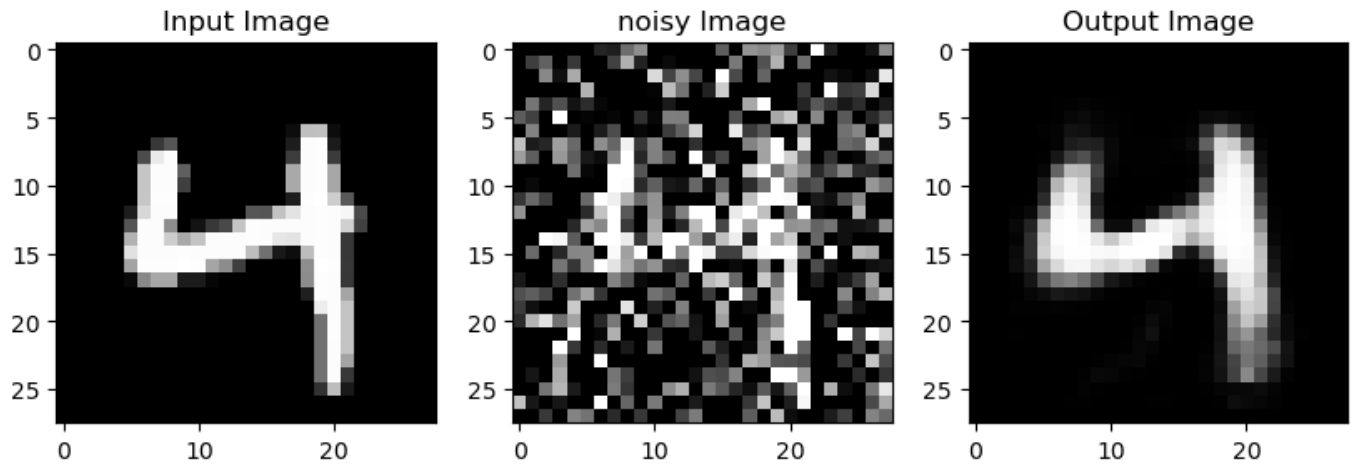 |
| Convolution Noisy Training | Convolution No Noise |
| 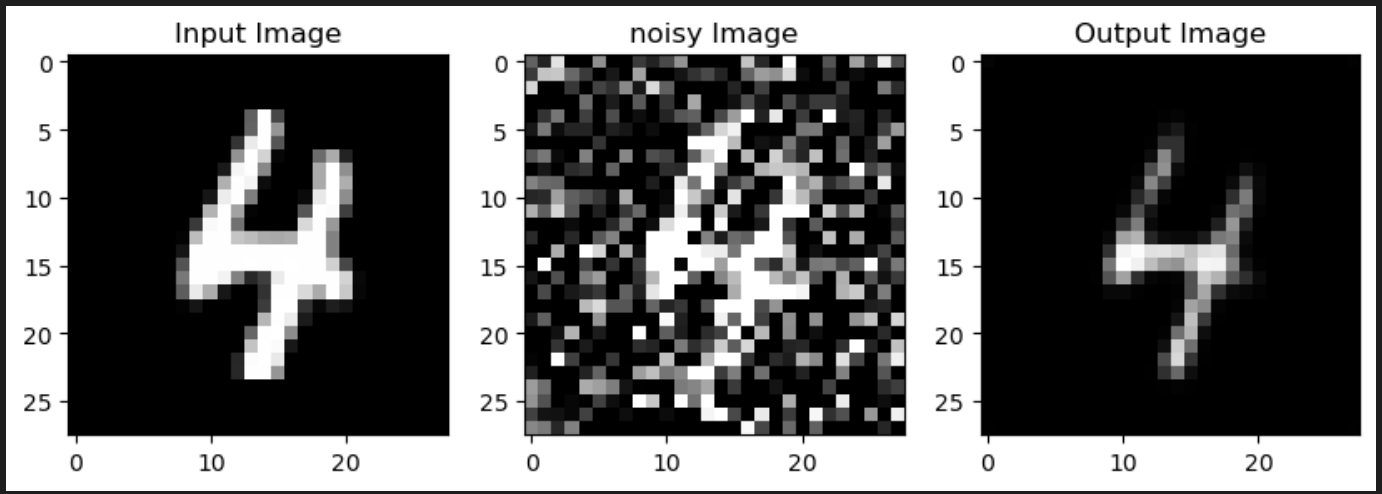 | 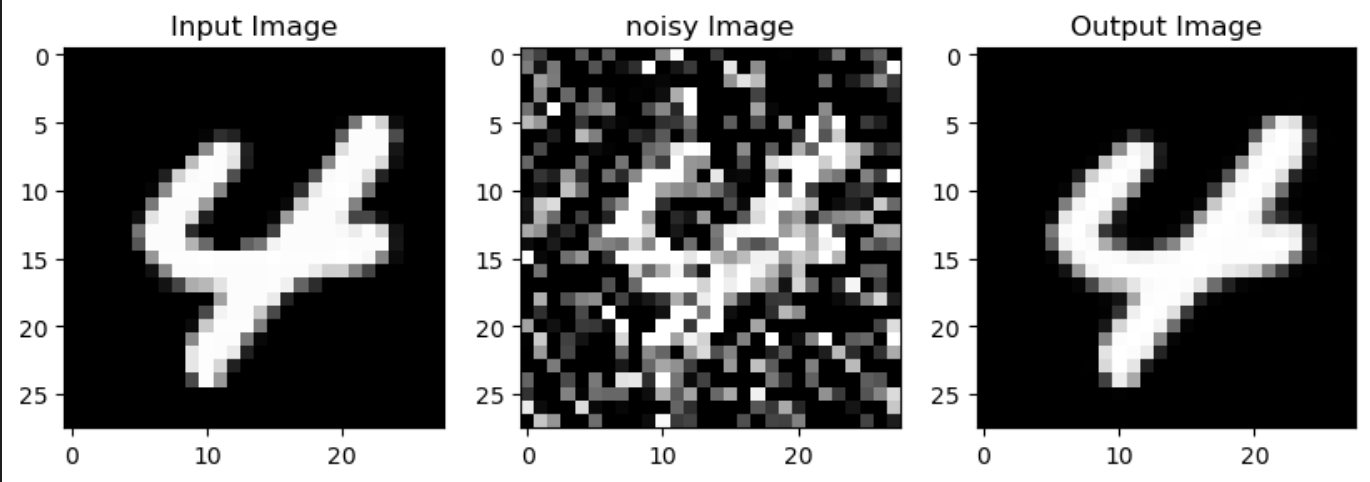 |

Question about adding noise to the date: do we do it before or after normalizing the data?